# SCH 빅데이터 공학과 3학년-2학기 텍스트 마이닝
날짜 : 2022-10-05 수요일 15:00 6주 12차시
교수 : 문지훈
학생 : 한태규

### 텍스트 데이터 전처리의 중요성
- 데이터 전처리 : 텍스트 데이터에 직접 대입하여 텍스트 마이닝을 수행하기 위한 필수적인 과정 > 특별한 규칙은 없으며, 본인 입맛과 기술에 따라 수행
- 정규 표현식 : 텍스트 문자열의 패턴 파악 및 식별
- 사전 처리
    - 대소문자 통일, 숫자/문장부호/특수문자/불용어 제거 같은 어근 동일화, N-gram 등
- 품사 분석 : 특정 품사만을 수집하여 분석
- 단어 빈도분석의 등장 배경과 문서의 단어 빈도를 분석할 수 있다. > 영어 문서, 한글 문서
- 문서별 핵심 단어들에 관한 워드 클라우드를 나타낼 수 있다.

# 수치 데이터를 분석하는 방법
- 데이터의 수, 평균, 표준편차, 최댓값, 최솟값 등

# 1. 단어 빈도분석

## 단어 빈도분석 알아보기
- 가장 기본적이지만 쉽고 보편적으로 활용되는 방법
- 본격적인 데이터 분석 전 데이터에 관한 이해와 흐름을 살펴보기 위한 기초 분석

- 전체 문서 또는 문서별 단어 출현 빈도를 보여줌
    - 특정 단어가 자주 많이 출현하면 핵심 단어라고 볼 수 있음

In [1]:
# 영어 문서의 단어 빈도분석
import pandas as pd
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

with open("../data/sch.txt", encoding="utf-8") as f:
    lines = f.readlines()[0]

In [2]:
lines

'A Message from the President My beloved Soonchunhyang students, faculty, staff, and alumni! Soonchunhyang University is a higher educational institution that opened Korea’s first medical corporation. For a half century, we have grown into one of the best and most prestigious private universities. Appointed as president, I am greatly honored and wish to open a new bright future with all of you. As the 9th president of Soonchunhyang University, I will cherish ‘Respect for Humanity’, the founding philosophy of the University and explore a new road by working with all of you in unison and with one mind. Based on the “good” university image of sustainability at Soonchunhyang, I will pursue innovation and excellence in academic performance, to rise as a “great university” that can exert continuous impact across our society. First, I will launch New Normal Blended Learning Innovation at Soonchunhyang. As the TLST (Teaching Less for Self-Teaching) paradigm has demonstrated, educational innova

In [3]:
from nltk import RegexpTokenizer

# 총장님의 말씀을 분석해보자!
lines[:100]
tokenizer = RegexpTokenizer("[\w]+")
stop_words = set(stopwords.words("english"))
words = lines.lower()
tokens = tokenizer.tokenize(words)

In [4]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [5]:
tokens

['a',
 'message',
 'from',
 'the',
 'president',
 'my',
 'beloved',
 'soonchunhyang',
 'students',
 'faculty',
 'staff',
 'and',
 'alumni',
 'soonchunhyang',
 'university',
 'is',
 'a',
 'higher',
 'educational',
 'institution',
 'that',
 'opened',
 'korea',
 's',
 'first',
 'medical',
 'corporation',
 'for',
 'a',
 'half',
 'century',
 'we',
 'have',
 'grown',
 'into',
 'one',
 'of',
 'the',
 'best',
 'and',
 'most',
 'prestigious',
 'private',
 'universities',
 'appointed',
 'as',
 'president',
 'i',
 'am',
 'greatly',
 'honored',
 'and',
 'wish',
 'to',
 'open',
 'a',
 'new',
 'bright',
 'future',
 'with',
 'all',
 'of',
 'you',
 'as',
 'the',
 '9th',
 'president',
 'of',
 'soonchunhyang',
 'university',
 'i',
 'will',
 'cherish',
 'respect',
 'for',
 'humanity',
 'the',
 'founding',
 'philosophy',
 'of',
 'the',
 'university',
 'and',
 'explore',
 'a',
 'new',
 'road',
 'by',
 'working',
 'with',
 'all',
 'of',
 'you',
 'in',
 'unison',
 'and',
 'with',
 'one',
 'mind',
 'based',
 

In [6]:
stopped_tokens = [i for i in tokens if not i in stop_words]
stopped_tokens2 = [i for i in stopped_tokens if len(i) > 1]
stopped_tokens2

['message',
 'president',
 'beloved',
 'soonchunhyang',
 'students',
 'faculty',
 'staff',
 'alumni',
 'soonchunhyang',
 'university',
 'higher',
 'educational',
 'institution',
 'opened',
 'korea',
 'first',
 'medical',
 'corporation',
 'half',
 'century',
 'grown',
 'one',
 'best',
 'prestigious',
 'private',
 'universities',
 'appointed',
 'president',
 'greatly',
 'honored',
 'wish',
 'open',
 'new',
 'bright',
 'future',
 '9th',
 'president',
 'soonchunhyang',
 'university',
 'cherish',
 'respect',
 'humanity',
 'founding',
 'philosophy',
 'university',
 'explore',
 'new',
 'road',
 'working',
 'unison',
 'one',
 'mind',
 'based',
 'good',
 'university',
 'image',
 'sustainability',
 'soonchunhyang',
 'pursue',
 'innovation',
 'excellence',
 'academic',
 'performance',
 'rise',
 'great',
 'university',
 'exert',
 'continuous',
 'impact',
 'across',
 'society',
 'first',
 'launch',
 'new',
 'normal',
 'blended',
 'learning',
 'innovation',
 'soonchunhyang',
 'tlst',
 'teaching',
 '

In [7]:
pd.Series(stopped_tokens2).value_counts().head()

university       23
soonchunhyang    21
brand             9
campus            8
top               8
dtype: int64

In [8]:
# 한글 문서의 단어 빈도분석
# 문지훈 교수의 순천향대학교 자소서를 분석해보자!
import pandas as pd
from konlpy.tag import Hannanum

hannanum = Hannanum()
with open(file="../data/hangul.txt",
          mode="rt",
          encoding="utf-8") as f:
    lines = f.readlines()

In [9]:
temp = []
for i in range(len(lines)):
    temp.append(hannanum.nouns(lines[i]))

In [10]:
# 중접 리스트를 하나의 리스트로 변환하는 함수
def flatten(data_list):
    flat_list = []
    for elem in data_list:
        if type(elem) == list:
            for e in elem:
                flat_list.append(e)
        else:
            flat_list.append(elem)
    return flat_list

In [11]:
word_list = flatten(temp)

In [12]:
# 두 글자 이상인 단어들만 추출
word_list = pd.Series([x for x in word_list if len(x) > 1])

In [13]:
word_list.value_counts().head(10)

학생들       30
연구        23
순천향대학교    16
경험        15
데이터       14
지식        14
교육        13
분석        13
학생        12
기술        11
dtype: int64

# 2. 워드 클라우드

In [25]:
# pip install wordcloud
from wordcloud import WordCloud
from collections import Counter
font_path = "../NanumGothic.ttf"

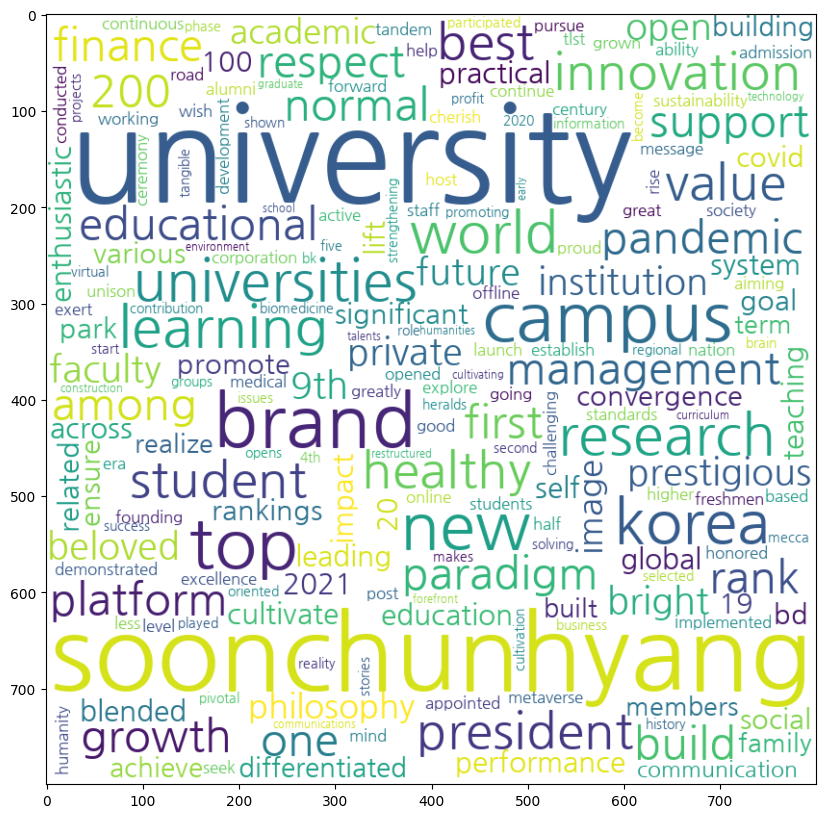

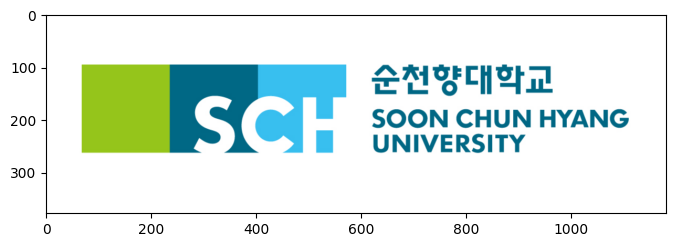

In [28]:
import numpy as np

word_cloud = WordCloud(
    font_path=font_path,
    width=800,
    height=800,
    background_color="white",
)

count = Counter(stopped_tokens2)
word_cloud = word_cloud.generate_from_frequencies(count)

def __array__(self):
    """ Convert to numpy array.

    :param self:
    :return: image : nd-array size  (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return self.to_array()

def to_array(self):
    """Convert to numpyarray.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpymatrix.
    """
    return np.array(self.to_image())

array = word_cloud.to_array()
get_ipython().run_line_magic("matplotlib", "inline")
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig("worldcloud.png")

from PIL import Image
sch_mask = np.array(Image.open("../sch.jpg"))

plt.figure(figsize=(8, 8))
plt.imshow(sch_mask, interpolation="bilinear")
plt.show()

In [29]:
count = Counter(stopped_tokens2)

wc_sch = WordCloud(
    font_path=font_path,
    mask=sch_mask,
    background_color="white"
)

wc_sch = wc_sch.generate_from_frequencies(count)

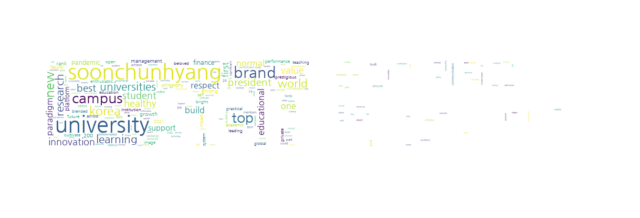

In [30]:
plt.figure(figsize=(8, 8))
plt.imshow(wc_sch, interpolation="bilinear")
plt.axis("off")
plt.show()

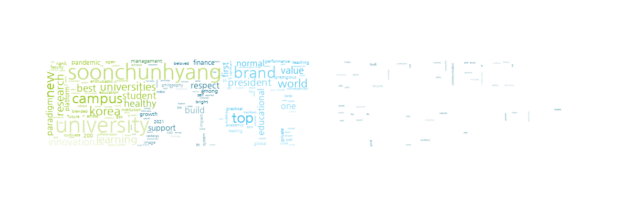

In [31]:
from  wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(sch_mask)

plt.figure(figsize=(8, 8))
plt.imshow(wc_sch.recolor(color_func=image_colors),
           interpolation="bilinear")
plt.axis("off")
plt.show()

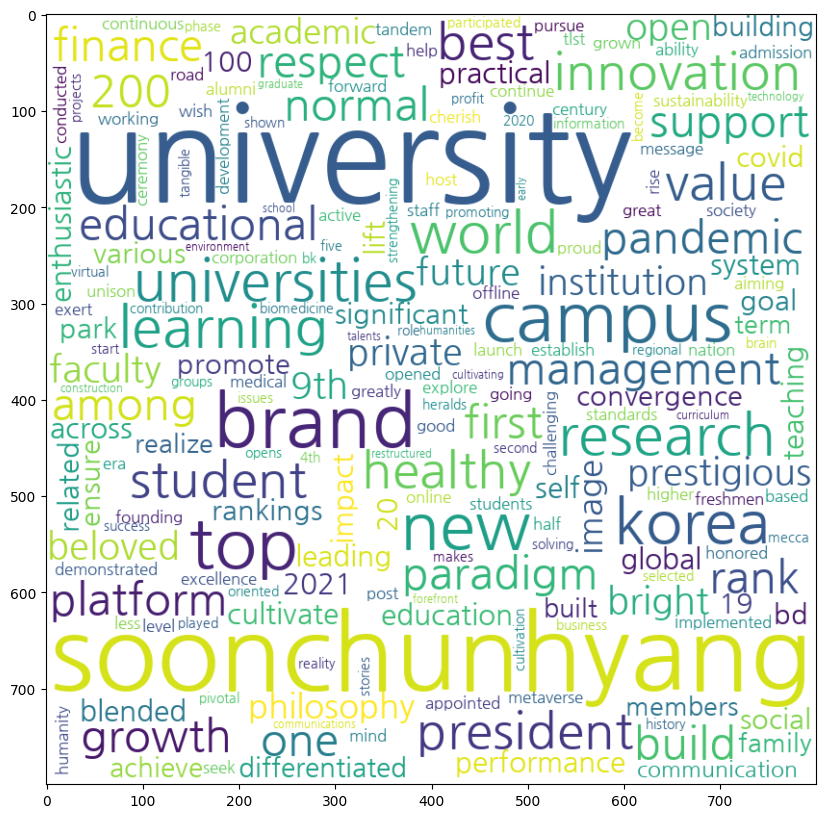

In [35]:
from wordcloud import WordCloud

count = Counter(word_list)

wc_sch = WordCloud(
    font_path=font_path,
    mask=sch_mask,
    background_color="white"
)

wc_sch = wc_sch.generate_from_frequencies(count)

array = word_cloud.to_array()
get_ipython().run_line_magic("matplotlib", "inline")

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig("wordcloud2.png")